<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import scipy.stats as stats

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
df = pd.read_csv("seeds_dataset.csv")
df.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.76,13.38,5.073,3.155,4.830,0
1,12.13,13.73,5.394,3.745,5.220,0
2,14.86,14.67,5.678,3.258,5.351,0
3,15.69,14.75,5.527,3.514,5.046,0
4,19.94,16.92,6.675,3.763,6.550,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              199 non-null    float64
 1   Perimeter         199 non-null    float64
 2   Kernel_len        199 non-null    float64
 3   Kernel_width      199 non-null    float64
 4   Kernelgroove_len  199 non-null    float64
 5   Type              199 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 9.5 KB


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a decision tree model using the gini criterion. And obtain the number of correctly predicted wheat seeds in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Consider the train-test split in the ratio 70:30 with random state = 1.

In [4]:
# type your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

decision_tree_full = DecisionTreeClassifier(random_state=1)

X = df.drop("Type" , axis = 1)

y = df["Type"]

X_train_full , X_test_full , y_train_full , y_test_full = train_test_split(X , y , test_size=0.3 , random_state=1)

decision_model_full = decision_tree_full.fit(X_train_full , y_train_full)

y_pred = decision_model_full.predict(X_test_full)

cm = confusion_matrix(y_test_full , y_pred)
tn , fp , fn , tp = cm.ravel()
print("number of correctly predicted: ",(tn+tp))

number of correctly predicted:  57


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Plot a decision tree for the model in the previous question and identify the seed type of the first observation in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len
175,17.08,15.38,5.832,3.683,5.484


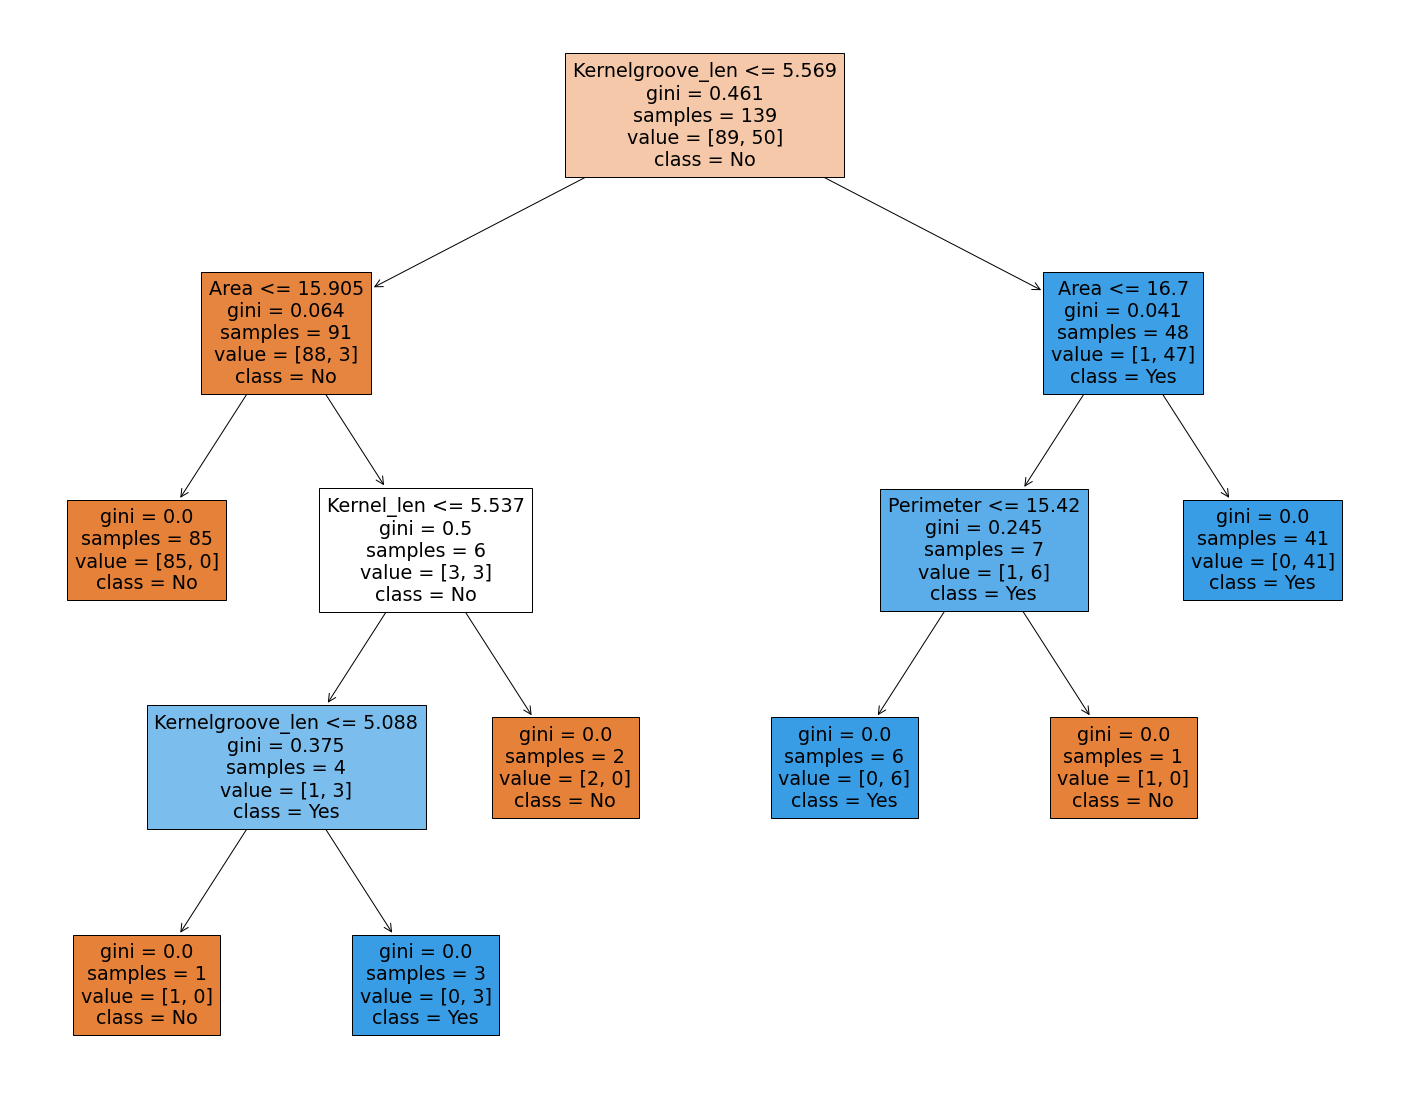

In [5]:
# type your code here
from sklearn import tree

plt.figure(figsize = (25,20))
tree = tree.plot_tree(decision_model_full , feature_names = X_train_full.columns ,
                     class_names=["No" , "Yes"],
                     filled=True)
X_test_full.head(1)

# We see that the predicted value for the above observation will be "Yes"

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Select the optimal number for decision trees from the given list of values to build a random forest using entropy criterion
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

no_of_trees = [6, 8, 10, 12, 14, 16]

In [6]:
# type your code here
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model_classifier = RandomForestClassifier()

tuned_para = [{'n_estimators' : [6, 8, 10, 12, 14, 16]}]

tree_grid = GridSearchCV(estimator=rf_model_classifier , param_grid=tuned_para ,cv = 5)

tree_grid.fit(X_train_full ,y_train_full)

print("The best value for number of decision trees is: ",tree_grid.best_params_ , '\n')

The best value for number of decision trees is:  {'n_estimators': 12} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the most important variable in the random forest build with the optimal number of trees obtained in Q3
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
random_forest_classifier = RandomForestClassifier(n_estimators=tree_grid.best_params_["n_estimators"])

random_forest_classifier = random_forest_classifier.fit(X_train_full ,y_train_full)

importance_features = pd.DataFrame({'features': X_train_full.columns,
                                   'importance':random_forest_classifier.feature_importances_})

importance_features.sort_values(by = 'importance' , ascending=False)

,features,importance
0,Area,0.383775
2,Kernel_len,0.217957
4,Kernelgroove_len,0.206963
1,Perimeter,0.177553
3,Kernel_width,0.013753


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Which is the best criterion to build a decision tree for the given dataset?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
from sklearn.model_selection import GridSearchCV

tuned_parameter = [{'criterion':["entropy" , "gini"]}]

decision_tree = DecisionTreeClassifier()

tree_grid = GridSearchCV(estimator=decision_tree ,
                        param_grid=tuned_parameter,
                        cv = 5)

tree_grid.fit(X_train_full , y_train_full)

print("Best parameter for decision tree classifier: ",tree_grid.best_params_ , '\n')

Best parameter for decision tree classifier:  {'criterion': 'entropy'} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a random forest containing ten trees and compute the precision and sensitivity of the model from the confusion matrix 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
from sklearn.metrics import confusion_matrix
rf_classifier  = RandomForestClassifier(n_estimators=10)

rf_classifier = rf_classifier.fit(X_train_full , y_train_full)

y_pred = rf_classifier.predict(X_test_full)

cm = confusion_matrix(y_test_full , y_pred)

tn , fp , fn , tp = cm.ravel()

print("Precision: " , tp / (tp+fp))
print("Sensitivity: ",tp/(tp+fn))

Precision:  0.8076923076923077
Sensitivity:  1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the optimal depth of the decision tree from the given list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth_values = [3, 5, 7, 9]

In [16]:
# type your code here

tuned_parameter = [{'max_depth':[3, 5, 7, 9]}]

decision_tree_classifier = DecisionTreeClassifier()

grid_tree = GridSearchCV(estimator=decision_tree_classifier , 
                        param_grid=tuned_parameter,
                        cv = 5)
grid_tree.fit(X_train_full , y_train_full)

print("Best optimal depth of decision tree is: ",grid_tree.best_params_)

Best optimal depth of decision tree is:  {'max_depth': 3}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build and plot a decision tree with maximum 5 terminal nodes (use the entropy criterion)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\juhib\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass criterion=entropy as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


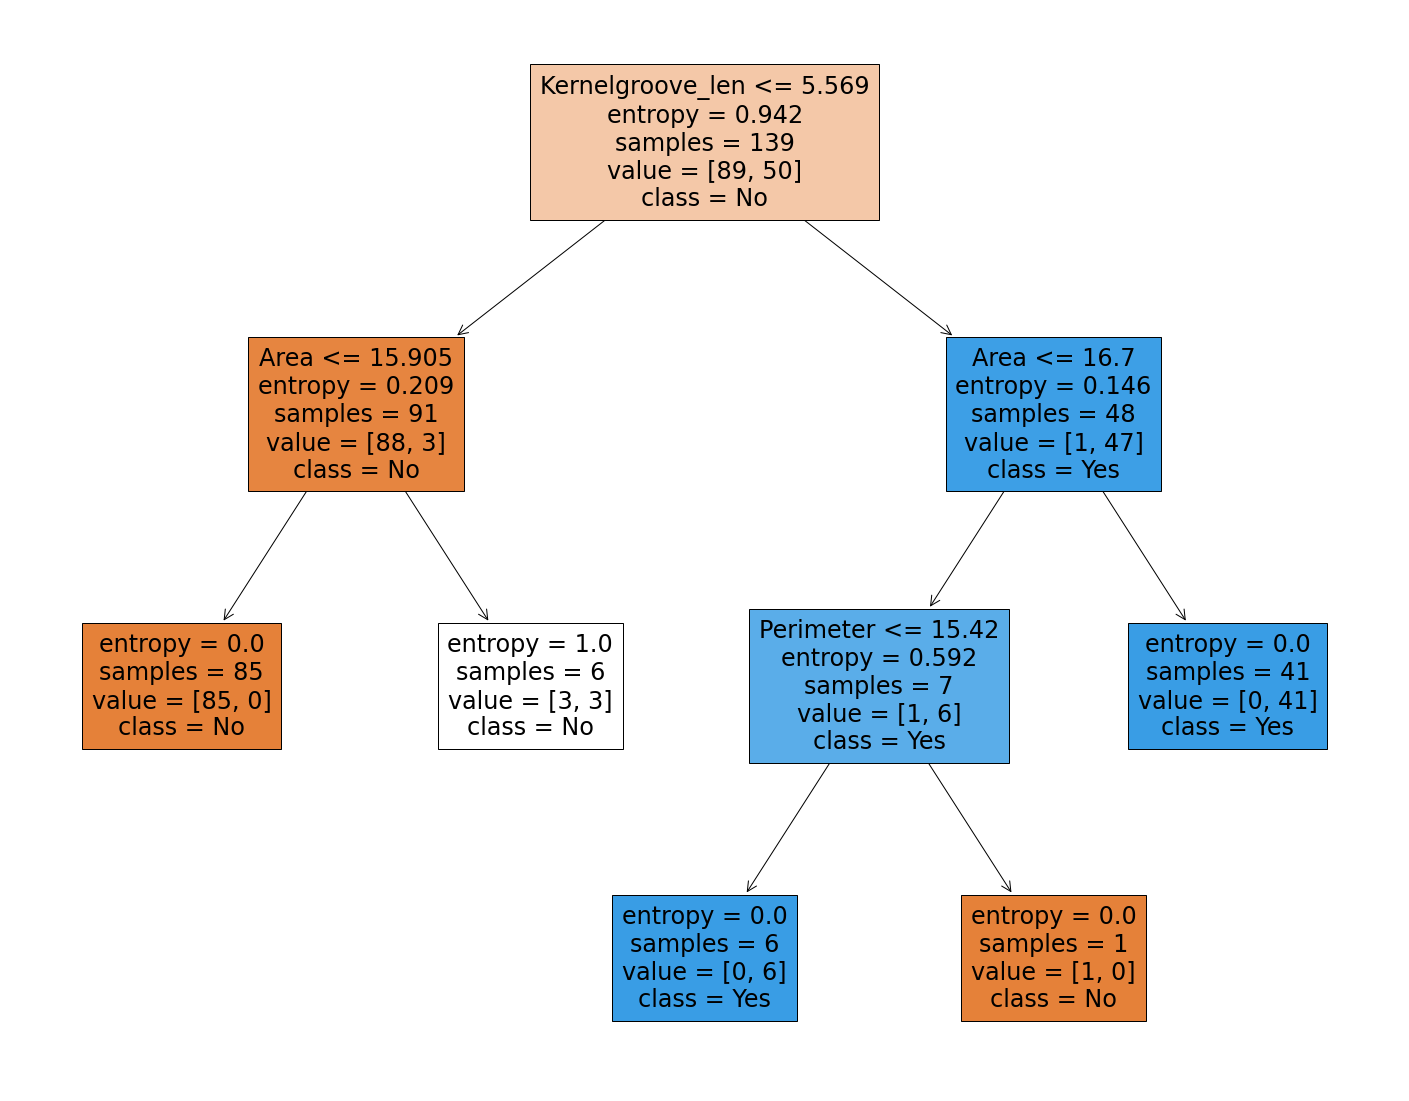

In [29]:
# type your code here
from sklearn import tree

decision_tree_max5 = DecisionTreeClassifier('entropy' , max_leaf_nodes=5)

decision_tree_max5 = decision_tree_max5.fit(X_train_full , y_train_full)

plt.figure(figsize = (25,20))
decision_tree_plot = tree.plot_tree(decision_tree_max5 , feature_names=X_train_full.columns , 
                                   class_names=["No","Yes"],
                                   filled = True)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a random forest with entropy criterion such that each leaf node will contain at least three samples. Also calculate the f-1 score and accuracy of the model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
from sklearn.metrics import accuracy_score , f1_score

random_classifier = RandomForestClassifier(max_leaf_nodes=3)

random_classifier = random_classifier.fit(X_train_full , y_train_full)

y_pred = random_classifier.predict(X_test_full)

print("Accuracy: ",accuracy_score(y_test_full , y_pred))
print("F1-Score: ",f1_score(y_test_full , y_pred))

Accuracy:  0.95
F1-Score:  0.9333333333333333


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Plot a decision tree with the optimal criterion such that it will contain no more than 4 terminal nodes and each terminal node will contain at least 5 observations  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\juhib\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass criterion=entropy as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


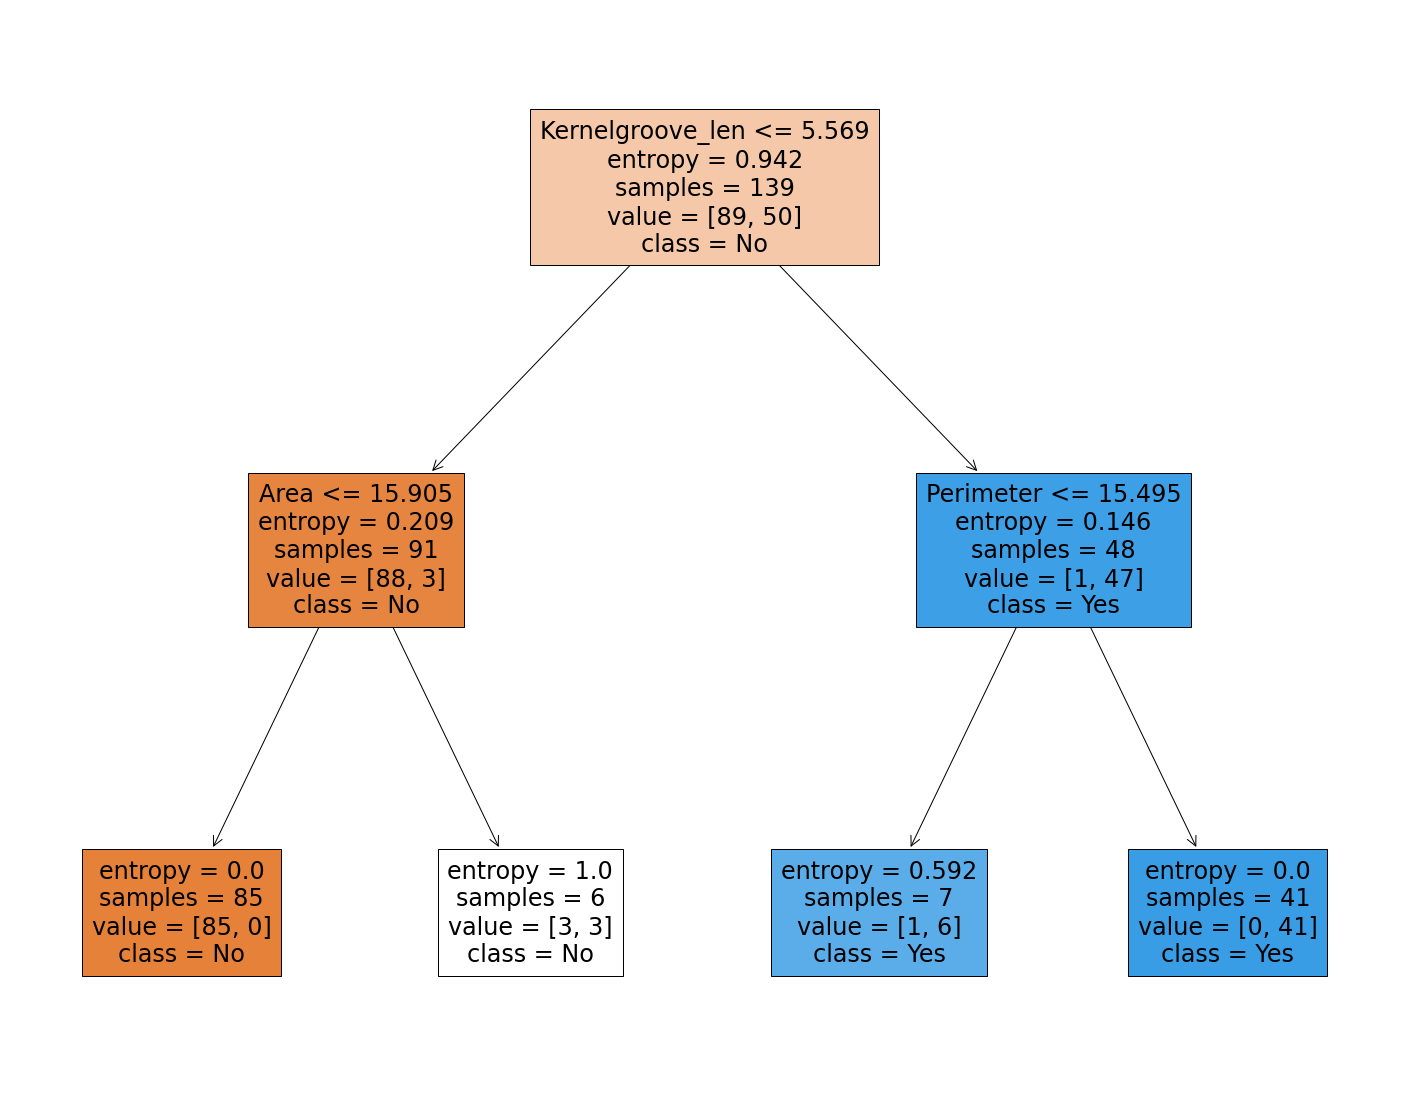

In [20]:
# type your code here
from sklearn import tree

decision_tree = DecisionTreeClassifier('entropy' , max_leaf_nodes=4 , min_samples_leaf=5)

decision_tree_max5 = decision_tree.fit(X_train_full , y_train_full)

plt.figure(figsize = (25,20))
decision_tree_plot = tree.plot_tree(decision_tree , feature_names=X_train_full.columns , 
                                   class_names=["No","Yes"],
                                   filled = True)
